## Conocimientos Necesarios

### TERMOSICLADOR

*participantes:*
1. Carolina Ramirez Lopez
2. Marco Rosas
3. Manuel Enrique Garcia Neve

[sintaxis de markdown ](https://markdown.es/sintaxis-markdown/#links)

aqui encontraremos un par de cosas las cuales son fundamentales para el proyecto del termosiclador el cual nos permitira hacer la replicacion de partes especifacas del ADN

__conocimiento en programacion sugerido:__
* python
* uso de GPIO
* creacion de ventanas python
* puerto serial


### interface:
code: pyinstaller --onefile -w (nombre del programa).py

para crear el instalador del programa para PC el cual nos permita crear el programa tal cual nosotros conocemos 
un porgrama 


### interface programada:
uso de libreria en Tkinter para la carcion de ventanas y lo que uno decee:

* [informacion tkinter ](https://docs.python.org/es/3/library/tkinter.html) 
* [informacion tkinter ](https://docs.hektorprofe.net/python/interfaces-graficas-con-tkinter/widget-button-boton/) (mejor)


## pyserial
Esta libreria es la que ofrece la comunicación de tipo serial entre un dispositvo y la computadora.
dla instalacion es de manera de comandos
en la terminal escribir:

In [ ]:
pip install pyserial

tras ejecutar el codigo se debera instalar la libreria de pyserial en el pc y solo sera cosa de impotar la libreria de manera normal "import pyserial"

para mas informacion visitar :[informacion pyseria ](https://pythonhosted.org/pyserial/)


## matplotlib
matplotlib es una libreria especializada en al animacion, estetica y visualizacion interactiva en python 
en la siguente hoja se pude encontrar algunos comando basicos

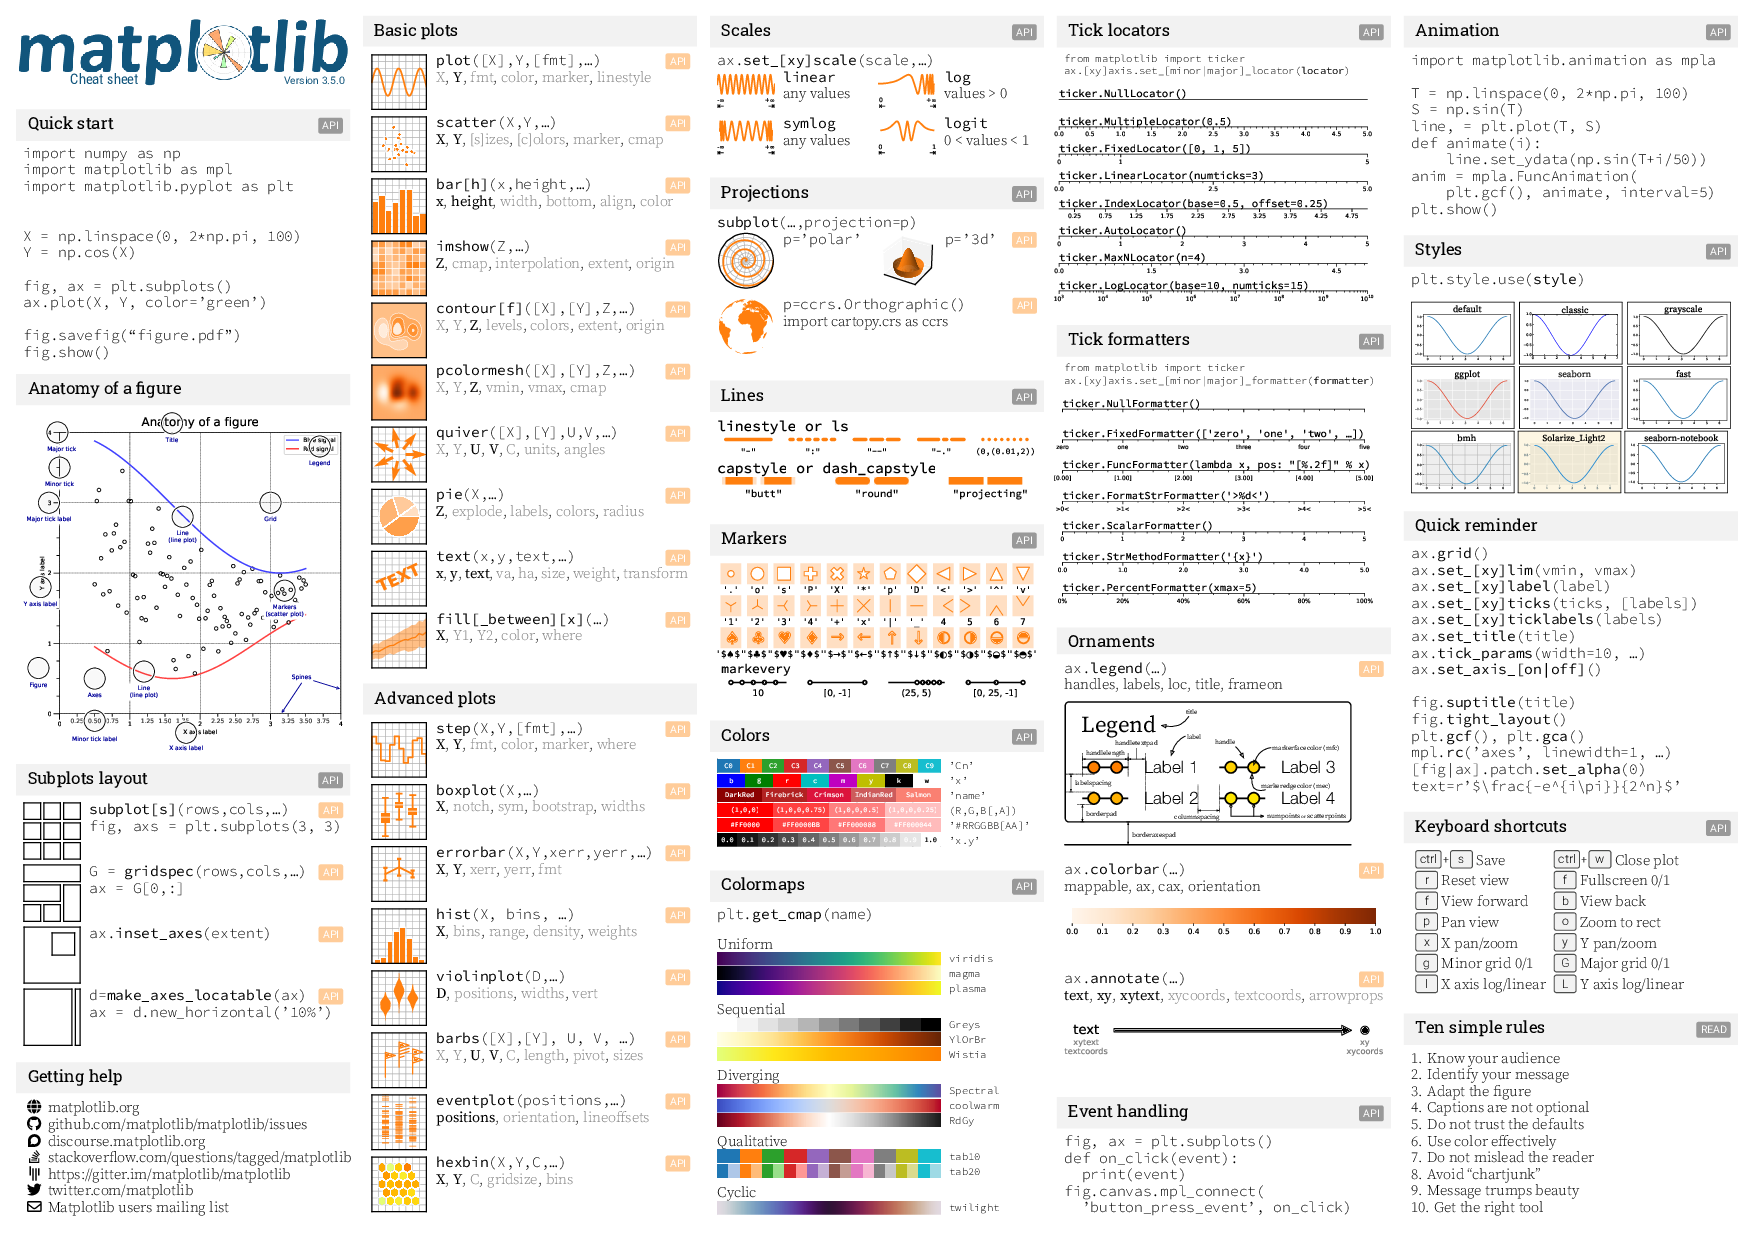

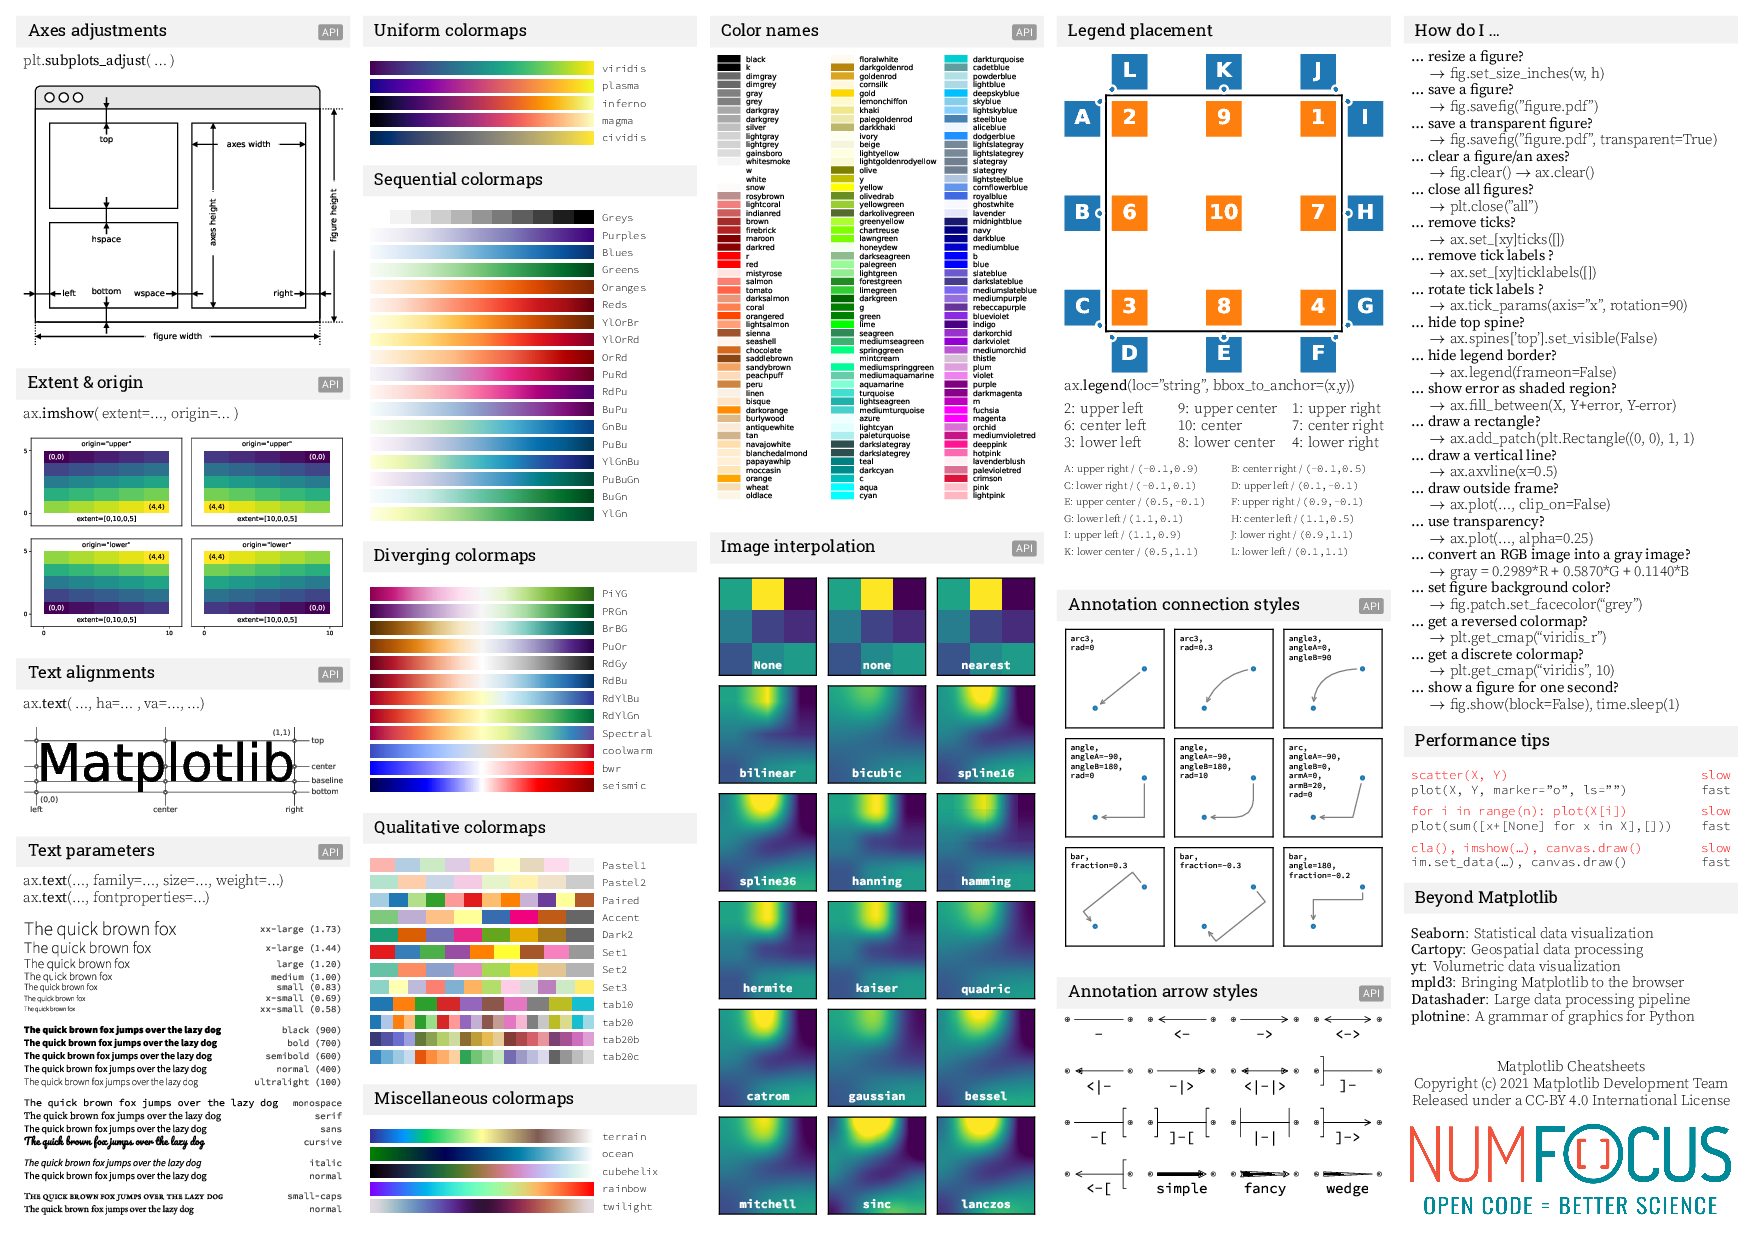

# pruebas
las pruebas se realizan en una maquina virtual con sistema operativo linux en el editor base de python

imagenes de los resultados obtenidos:


microprocesador 
uno: checar lo de programacion con forme a la programacion en tiempio real 
dos: checar como se programa un pic16f874a
![IMAGEN.png](attachment:IMAGEN.png)
checar el pin 36 del bloque de programcion
memoria, reloj y interruptor interno, interruptor de emrgencia 


### PT1


Para que este código funcione correctamente en Arduino, necesitas instalar las siguientes bibliotecas:

Arduino.h (Viene incluida por defecto en el entorno de desarrollo de Arduino)
OneWire (Para la comunicación con sensores de temperatura DS18B20)
DallasTemperature (Para manejar sensores DS18B20 de manera más sencilla)
Instalación de Librerías
Puedes instalar estas bibliotecas desde el Administrador de Librerías en el IDE de Arduino:

Abre el IDE de Arduino.
Ve a Programa → Incluir Librería → Administrar Bibliotecas.
Busca e instala las siguientes librerías:
OneWire (de Paul Stoffregen)
DallasTemperature (de Miles Burton)
Después de instalar estas librerías, el código funcionará correctamente con el sensor DS18B20 y el control de temperatura. 

In [ ]:
#include <Arduino.h>
#include <OneWire.h>
#include <DallasTemperature.h>

// Definir pines
#define ONE_WIRE_BUS 2 // Pin donde está conectado el sensor de temperatura DS18B20
#define H_BRIDGE_UP 3   // Pin de control para aumentar la temperatura
#define H_BRIDGE_DOWN 4 // Pin de control para disminuir la temperatura

// Configurar sensor de temperatura
OneWire oneWire(ONE_WIRE_BUS);
DallasTemperature sensors(&oneWire);

// Variables de control
float tempMax, tempMin, tempMed; // Temperaturas de referencia
int numCiclos;                   // Número de ciclos de control
unsigned long tiempo;             // Tiempo de espera entre mediciones

void setup() {
    Serial.begin(9600); // Iniciar comunicación serial
    sensors.begin();    // Iniciar el sensor de temperatura
    
    // Configurar pines del puente H como salidas
    pinMode(H_BRIDGE_UP, OUTPUT);
    pinMode(H_BRIDGE_DOWN, OUTPUT);
    
    // Inicializar pines en estado bajo (apagado)
    digitalWrite(H_BRIDGE_UP, LOW);
    digitalWrite(H_BRIDGE_DOWN, LOW);
}

void loop() {
    if (Serial.available() > 0) {
        // Leer datos del puerto serial en el orden esperado
        tempMax = Serial.parseFloat(); // Temperatura máxima permitida
        tempMin = Serial.parseFloat(); // Temperatura mínima permitida
        tempMed = Serial.parseFloat(); // Temperatura media de referencia
        numCiclos = Serial.parseInt(); // Número de ciclos a ejecutar
        tiempo = Serial.parseInt();    // Tiempo de espera entre mediciones (en segundos)
        
        // Mostrar en el monitor serial los valores recibidos
        Serial.println("Datos recibidos correctamente");
        Serial.print("Temp Max: "); Serial.println(tempMax);
        Serial.print("Temp Min: "); Serial.println(tempMin);
        Serial.print("Temp Med: "); Serial.println(tempMed);
        Serial.print("Ciclos: "); Serial.println(numCiclos);
        Serial.print("Tiempo: "); Serial.println(tiempo);

        // Ejecutar ciclo de temperatura
        for (int i = 0; i < numCiclos; i++) {
            Serial.print("Ciclo "); Serial.println(i + 1);
            
            // Subir a temperatura máxima
            while (leerTemperatura() < tempMax) {
                digitalWrite(H_BRIDGE_UP, HIGH);
                digitalWrite(H_BRIDGE_DOWN, LOW);
                delay(tiempo * 1000);
            }
            detenerControl();
            
            // Bajar a temperatura media
            while (leerTemperatura() > tempMed) {
                digitalWrite(H_BRIDGE_UP, LOW);
                digitalWrite(H_BRIDGE_DOWN, HIGH);
                delay(tiempo * 1000);
            }
            detenerControl();
            
            // Bajar a temperatura mínima
            while (leerTemperatura() > tempMin) {
                digitalWrite(H_BRIDGE_UP, LOW);
                digitalWrite(H_BRIDGE_DOWN, HIGH);
                delay(tiempo * 1000);
            }
            detenerControl();
        }
        
        // Bajar la temperatura a -5°C al final del número de ciclos
        Serial.println("Bajando la temperatura a -5°C");
        while (leerTemperatura() > -5.0) {
            digitalWrite(H_BRIDGE_UP, LOW);
            digitalWrite(H_BRIDGE_DOWN, HIGH);
            delay(tiempo * 1000);
        }
        detenerControl();
        Serial.println("Proceso finalizado");
    }
}

// Función para leer la temperatura actual del sensor
float leerTemperatura() {
    sensors.requestTemperatures();
    float temp = sensors.getTempCByIndex(0);
    Serial.print("Temperatura actual: ");
    Serial.println(temp);
    return temp;
}

// Función para detener el control de temperatura
void detenerControl() {
    digitalWrite(H_BRIDGE_UP, LOW);
    digitalWrite(H_BRIDGE_DOWN, LOW);
    Serial.println("Control detenido");
}


liga de zoom para la revicion 
Únase a la reunión de Zoom
https://uammx.zoom.us/j/84868104236

ID de reunión: 848 6810 4236
Código de acceso: 851547


economico........
agregar el area economica y financiera para dimencionar 
estimacion financiera para el termociclador (uso de CHANT GPT)